In [5]:
import math
def square(number):
  return number*number

In [7]:
def squareRoot(number):
  return math.sqrt(number)

In [11]:
PI = math.pi
print (PI)

3.141592653589793


In [4]:
distanceBetweenPulleys = 0.43 #meter
leftStringLengthFromMotorToPulley = 0.25 #meter
rightStringLengthFromMotorToPulley = 0.26 #meter
lengthFromMotorToCenterOfPencil = 0.075 #meter
leftHypotneuse = leftStringLengthFromMotorToPulley + lengthFromMotorToCenterOfPencil
rightHypotneuse = rightStringLengthFromMotorToPulley + lengthFromMotorToCenterOfPencil

In [9]:
xCoordinate = (square(distanceBetweenPulleys) + square(leftStringLengthFromMotorToPulley) - square(rightStringLengthFromMotorToPulley))/(2*distanceBetweenPulleys)
yCoordinate = squareRoot(square(leftStringLengthFromMotorToPulley) - square(xCoordinate))
print (xCoordinate, yCoordinate)

0.20906976744186043 0.1370760093590647


Drawing a circle of radius one and measuring the circumference that is the length of the enclosing **arc = 3.14 = PI**.

No matter how big the circle when we measure the **circumference** and **diameter** & **divide** the circumference by the **diameter** it is always equal to the number **PI**.


```
Diameter = 2 * Radius
Circumference = 2 * PI * Radius
Circumference/(2*Radius) = PI
```



In [41]:
numberOfCountsPerRotation = 1200
numberOfCountsPerRadian = 1200 / (2 * PI)
print (numberOfCountsPerRadian)
percentPerRadian = numberOfCountsPerRadian/1200
print ("Percentage: "+str(percentPerRadian))


190.9859317102744
Percentage: 0.15915494309189535


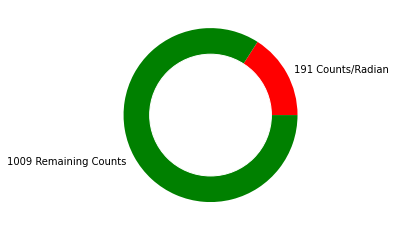

In [45]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = str(round(numberOfCountsPerRadian))+' Counts/Radian', str(1200-round(numberOfCountsPerRadian))+' Remaining Counts'
sizes = [percentPerRadian, 1-percentPerRadian]
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(sizes, labels=labels, colors=['red','green'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [13]:
countsOnLeftMotor = 9000
countsOnRightMotor = 10000
radiansMovedInLeftMotor = countsOnLeftMotor / numberOfCountsPerRadian
radiansMovedInRightMotor = countsOnRightMotor / numberOfCountsPerRadian
print(radiansMovedInLeftMotor, radiansMovedInRightMotor)

47.1238898038469 52.35987755982989


In [14]:
spoolRadius = 0.0045
stringCoiledByLeftMotor = radiansMovedInLeftMotor * spoolRadius
stringCoiledByRightMotor = radiansMovedInRightMotor * spoolRadius
print(stringCoiledByLeftMotor, stringCoiledByRightMotor)

0.21205750411731103 0.23561944901923448


In [15]:
leftDistanceMoved = stringCoiledByLeftMotor/2 #moving up or down takes twice string length due to the way it is setup
rightDistanceMoved = stringCoiledByRightMotor/2
print(leftDistanceMoved, rightDistanceMoved)

0.10602875205865551 0.11780972450961724


In [27]:
def motorMovementsToXAndYCoordinate(initialPosition, motorCounts):
  distanceBetweenPulleys = 0.43
  numberOfCountsPerRotation = 1200
  numberOfCountsPerRadian = 1200 / (2 * PI)
  spoolRadius = 0.0045
  radiansMovedByMotor = [counts/numberOfCountsPerRadian for counts in motorCounts]
  print ("Radians Moved:"+str(radiansMovedByMotor))
  stringCoiledByMotor = [(radians*spoolRadius)/2 for radians in radiansMovedByMotor]
  print ("Coiled String on Spool:"+str(stringCoiledByMotor))
  distanceMovedAlongHypotneuse = [sum(distance) for distance in zip(initialPosition, stringCoiledByMotor)] 
  print ("Movement along hypotneuse:"+str(distanceMovedAlongHypotneuse))
  xCoordinate = (square(distanceBetweenPulleys) + square(distanceMovedAlongHypotneuse[0]) - square(distanceMovedAlongHypotneuse[1]))/(2*distanceBetweenPulleys)
  yCoordinate = squareRoot(square(distanceMovedAlongHypotneuse[0]) - square(xCoordinate))
  newCoordinate = [xCoordinate, yCoordinate]
  print ("New Coordinate:"+str(newCoordinate))
  return newCoordinate

motorMovementsToXAndYCoordinate([0.25 + 0.075, 0.26 + 0.075],[9000, 10000])

Radians Moved:[47.1238898038469, 52.35987755982989]
Coiled String on Spool:[0.10602875205865551, 0.11780972450961724]
Movement along hypotneuse:[0.43102875205865554, 0.45280972450961726]
New Coordinate:[0.1926152773148447, 0.38559712141841435]


[0.1926152773148447, 0.38559712141841435]

In [48]:
initialCoordinate = [0.1926152773148447, 0.38559712141841435]
leftHypotneuse = squareRoot(square(initialCoordinate[0])+square(initialCoordinate[1]))
rightHypotneuse = squareRoot(square(distanceBetweenPulleys - initialCoordinate[0]) + square(initialCoordinate[1]))
newHypotneuse = [leftHypotneuse, rightHypotneuse]
print (newHypotneuse)

[0.4310287520586555, 0.4528097245096172]


In [59]:
previousHypotnuese = [0.25 + 0.075, 0.26 + 0.075]
distanceMovedAlongHypotneuse = [2*(distance[1] - distance[0]) for distance in zip(previousHypotnuese, newHypotneuse)] 
print ("Movement along hypotneuse:"+str(distanceMovedAlongHypotneuse))
radiansMoved = [distance/spoolRadius for distance in distanceMovedAlongHypotneuse]
print ("Radians Moved:"+str(radiansMoved))
motorCounts =[round(radian*numberOfCountsPerRadian) for radian in radiansMoved]
print(motorCounts)

Movement along hypotneuse:[0.21205750411731095, 0.23561944901923437]
Radians Moved:[47.12388980384688, 52.35987755982986]
[9000, 10000]
